##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 2 Report

### Group Members:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [3]:
from IPython.display import Image #For displaying images in colab jupyter cell

# Exercise 1: Loops vs Numpy operations

In [4]:
Image('lab2_exercise1.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

<IPython.core.display.Image object>

In [5]:
import time # Import time to measure computational efficiency of the code

In [6]:
arr2d_1 = np.random.randn(1000, 1000) * 10
arr2d_2 = np.random.randn(1000, 1000) * 10

In [7]:
# Elementwise addition using loop

arr2d_3_loop = np.zeros((1000, 1000)) # Create a placeholder array for arr2d_3

start_time_loop = time.time() # start time of the code

# YOUR CODE HERE FOR ELEMENTWISE ADDITION USING TWO NESTED LOOPS
for i in range(len(arr2d_1)):
    for j in range(len(arr2d_1)):
        arr2d_3_loop[i,j] = arr2d_1[i,j] + arr2d_2[i,j]

# adding up 2 arrays      
        
end_time_loop = time.time() # end time of the code

elapsed_time_loop = end_time_loop - start_time_loop # end time - start time -> elapsed time in seconds
print(elapsed_time_loop)

0.7535181045532227


In [8]:
# Elementwise addition using Numpy function

start_time_np = time.time()

arr2d_3_np = arr2d_3_np = np.add(arr2d_1, arr2d_2)

#numpy way to add up 2 arrays

end_time_np = time.time()

elapsed_time_np = end_time_np - start_time_np
print(elapsed_time_np)

0.0050830841064453125


In [9]:
# Make sure two outputs are equivalent

np.sum(arr2d_3_loop == arr2d_3_np) == 1000 * 1000 # Should output True if the outputs are same

True

### Which computation is faster and by what factor?

NumPy is fast because it can do all its calculations without calling back into Python. 

### e.g. a code that takes 0.1s is faster by a factor of 10 compared to a code that takes 1s

In [10]:
# Elementwise addition using Numpy function

# Exercise 2: Generate Triangular Waveform

In [11]:
Image('lab2_exercise2.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise2.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise2.PNG'

<IPython.core.display.Image object>

<StemContainer object of 3 artists>

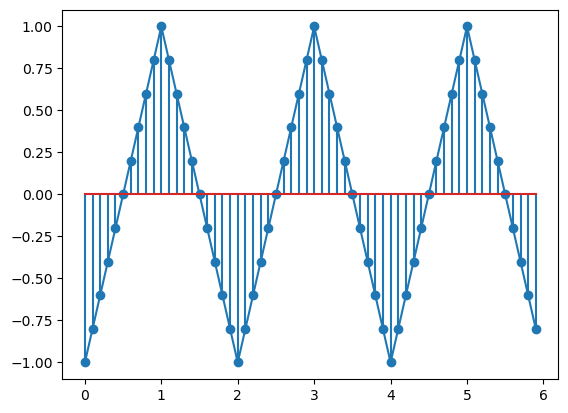

In [12]:
f = 1/10
a = 1
x = np.arange(0, 6, f)  #the plot
y = (2/(math.pi)*np.arcsin(np.sin(((math.pi))*x-(math.pi)/2)))  #function 
plt.plot(x,y)
plt.stem(x,y) #plot-up

# Exercise 3: Sinusoidal Generator

In [13]:
Image('lab2_exercise3.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise3.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise3.PNG'

<IPython.core.display.Image object>

In [14]:
# Define generate_sine function

def generate_sine(t_duration, f0, fs):
    
    
    
    t_arr = np.arange(0,t_duration , 1/fs)
    
    amplitudes = np.sin(2*(math.pi)*f0*t_arr)

    
    # Return 1D numpy arrays each containing timepoints and sine waveform amplitudes
    return t_arr, amplitudes 

In [15]:
# parameter set 1
t_duration_1 = 5
f0_1 = 0.5
fs_1 = 100
t_arr_1, amplitudes_1 = generate_sine(t_duration_1, f0_1, fs_1)


# parameter set 2
t_duration_2 = 5
f0_2 = 1.
fs_2 = 100
t_arr_2, amplitudes_2 = generate_sine(t_duration_2, f0_2, fs_2)

# parameter set 3
t_duration_3 = 5
f0_3 = 1.5
fs_3 = 100
t_arr_3, amplitudes_3 = generate_sine(t_duration_3, f0_3, fs_3)

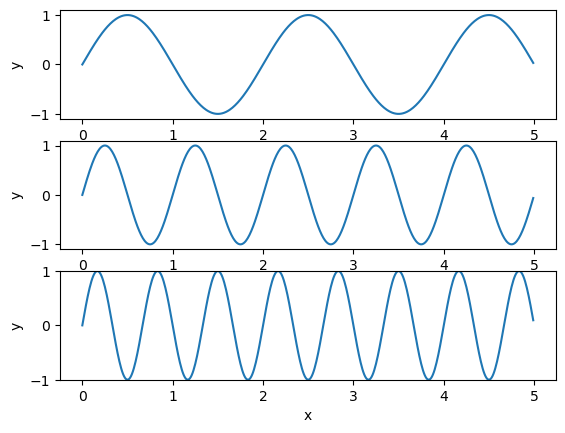

In [16]:
# Plot 3 x 1 subplot showing all three waveform
# (number of rows, number of columns, current plot)
plt.subplot(311)           
plt.plot(t_arr_1, amplitudes_1)

plt.xlabel('x')
plt.ylabel('y')

plt.subplot(312)
plt.plot(t_arr_2, amplitudes_2)

plt.xlabel('x')
plt.ylabel('y')

plt.subplot(313)
plt.plot(t_arr_3, amplitudes_3)

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 1)

plt.show()

# Exercise 4: Notes Synthesis

In [17]:
Image('lab2_exercise4.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise4.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise4.PNG'

<IPython.core.display.Image object>

In [18]:
import simpleaudio as sa
from scipy.io import wavfile as wav  
t1,amp_A = generate_sine(1,220,8000)
t2,amp_B = generate_sine(1,220*2**(2/12),8000)
t3,amp_C = generate_sine(1,220*2**(4/12),8000)
t4,amp_D = generate_sine(1,220*2**(5/12),8000)
t5,amp_E = generate_sine(1,220*2**(7/12),8000)
t6,amp_F = generate_sine(1,220*2**(9/12),8000)
t7,amp_G = generate_sine(1,220*2**(11/12),8000)
t8,amp_AA = generate_sine(1,440,8000)

#synthesize notes

ptuba_data = np.concatenate([amp_A,amp_B,amp_C,amp_D,amp_E,amp_F,amp_G,amp_AA])

#constructing output

outfile = 'a_major_scale.wav'

#wav file output

wav.write(outfile,8000,(ptuba_data*32767).astype('int16'))

wav_obj = sa.WaveObject.from_wave_file('a_major_scale.wav')

play_obj = wav_obj.play()
play_obj.wait_done()


In [19]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 

# Exercise 5: Chord Synthesis

In [20]:
Image('lab2_exercise5.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise5.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise5.PNG'

<IPython.core.display.Image object>

In [21]:
chord1 = amp_A + amp_C
chord2 = amp_B + amp_D
chord3 = amp_C + amp_E
chord4 = amp_D + amp_F
chord5 = amp_E + amp_G
chord6 = amp_F + amp_AA

#synthesizing chords

chordup_data = np.concatenate([chord1,chord2,chord3,chord4,chord5,chord6])/2

#composing sound data

outfile = '6_chords.wav'

#wav file output

wav.write(outfile,8000,(chordup_data*32767).astype('int16'))

wav_obj = sa.WaveObject.from_wave_file('6_chords.wav')

play_obj = wav_obj.play()
play_obj.wait_done()


In [22]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 